In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib import gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score, auc, roc_auc_score, log_loss, mean_squared_error
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from rit.tree import DecisionTreeClassifier as MyDecisionTreeClassifier
from rit.tree import DecisionTreeRegressor as MyDecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from rit.ensemble import RandomForestClassifier as MyRandomForestClassifier
from rit.ensemble import RandomForestRegressor as MyRandomForestRegressor

from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification, make_regression

from scipy.stats import f_oneway

from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

from scipy.stats import mannwhitneyu

# helpfunctions

In [7]:
def Visualise_classification_2D(X, y):
  cols = ['blue', 'red', 'green', 'yellow']
  plt.figure(figsize=(9,4))
  plt.xlim((np.min(X) - 0.5, np.max(X) + 0.5)),
  plt.ylim((np.min(X) - 0.5, np.max(X) + 0.5))

  for k in np.unique(y):
      plt.plot(X[y==k,0], X[y==k,1], 'o',
                label='класс {}'.format(k), color=cols[k])

  plt.legend(loc='best')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

def Visualise_regression_2D(X, y, xlim, ylim):
  plt.figure(figsize=[9, 4])
  plt.xlim((xlim[0], xlim[1]))
  plt.ylim((ylim[0], ylim[1]))

  sc = plt.scatter(X[:, 0], X[:, 1], c=y, s=5)

  plt.colorbar(sc)

  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

In [43]:
def func_reg(X, y, alpha):
  params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15], 'n_estimators': [2500]}
  clf = GridSearchCV(MyRandomForestRegressor(random_state=0,
                                              n_estimators=params['n_estimators'],
                                              max_depth=params['max_depth'],
                                              max_leaf_nodes=2**max(params['max_depth']),
                                              bootstrap=True,
                                              oob_score=mean_squared_error,
                                              subforest_importance=True,
                                              normalize_importance=False,
                                              rit_alpha=alpha),
                   params,
                   scoring = lambda est, X, y: -est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))])
  clf.fit(X, y)
  rf = clf.best_estimator_
  print("rit_alpha = {}, max_depth = {}".format(rf.rit_alpha, rf.max_depth))
  return rf.oob_score_


def func_class(X, y, alpha):
  params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 18], 'n_estimators': [2500]}
  clf = GridSearchCV(MyRandomForestClassifier(random_state=0,
                                              n_estimators=params['n_estimators'],
                                              max_depth=params['max_depth'],
                                              max_leaf_nodes=2**max(params['max_depth']),
                                              bootstrap=True,
                                              oob_score=accuracy_score,
                                              subforest_importance=True,
                                              normalize_importance=False,
                                              rit_alpha=alpha),
                   params,
                   scoring = lambda est, X, y: est.oob_score_, 
                   cv=[(np.arange(X.shape[0]), np.arange(0))])
  clf.fit(X, y)
  rf = clf.best_estimator_
  print("rit_alpha = {}, max_depth = {}".format(rf.rit_alpha, rf.max_depth))
  return rf.oob_score_

# Выборки

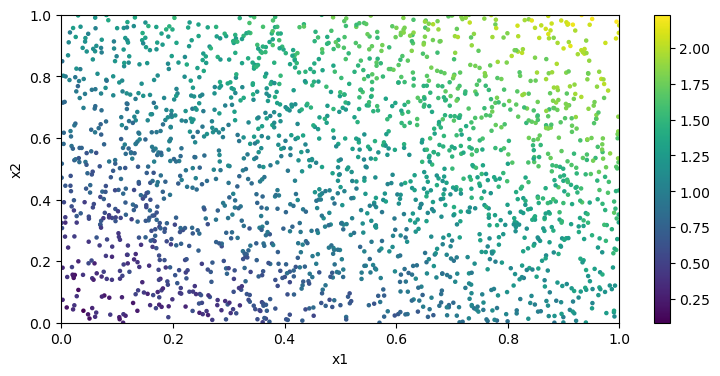

In [9]:
def data_regression_2D_1():
  n = 2
  N = 2000

  X1 = np.random.random(N)
  X2 = np.random.random(N)

  y = X1 + X2 + np.random.random(N)/3
  X = np.vstack([X1, X2]).transpose(1, 0)

  return X, y

X, y = data_regression_2D_1()
Visualise_regression_2D(X, y, (0, 1), (0, 1))

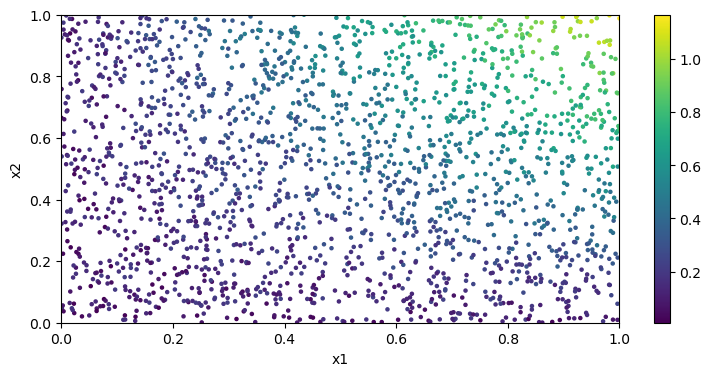

In [10]:
def data_regression_2D_2():
  n = 2
  N = 2000

  X1 = np.random.random(N)
  X2 = np.random.random(N)

  y = X1 * X2 + np.random.random(N)/5
  X = np.vstack([X1, X2]).transpose(1, 0)

  return X, y

X, y = data_regression_2D_2()
Visualise_regression_2D(X, y, (0, 1), (0, 1))

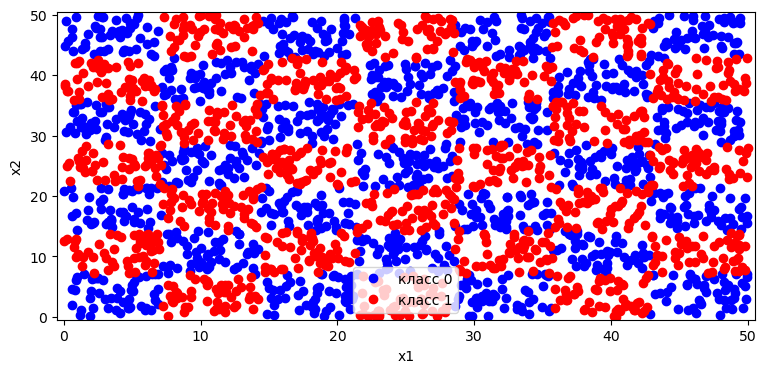

In [11]:
def data_classification_2D_3():
    n = 2
    l = 2000

  # Параметры
    width = 50         # Ширина прямоугольника
    height = 50        # Высота прямоугольника
    cols = 7            # Количество столбцов сетки
    rows = 7           # Количество строк сетки
    points_per_cell = 50  # Количество точек в каждой ячейке

    # Вычисление размеров ячейки
    cell_width = width / cols
    cell_height = height / rows

    # Генерация данных
    X = []
    y = []

    for i in range(cols):
        for j in range(rows):
            # Генерация координат точек внутри ячейки (i, j)
            x_points = np.random.uniform(i * cell_width, (i + 1) * cell_width, points_per_cell)
            y_points = np.random.uniform(j * cell_height, (j + 1) * cell_height, points_per_cell)
            
            # Определение класса (шахматный порядок)
            class_label = (i + j) % 2
            
            # Сохранение данных
            X.extend(np.column_stack((x_points, y_points)))
            y.extend([class_label] * points_per_cell)

    X = np.array(X)
    y = np.array(y)

    return X, y

X, y = data_classification_2D_3()
Visualise_classification_2D(X, y)

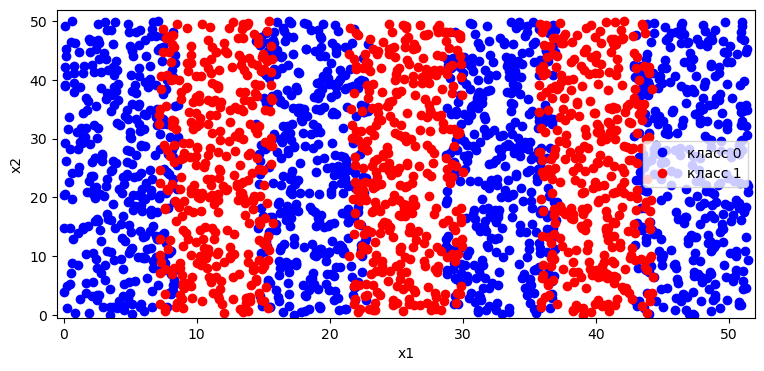

In [12]:
def data_classification_2D_4():
    n = 2
    l = 2000

    # Параметры
    width = 50        # Ширина прямоугольника
    height = 50         # Высота прямоугольника
    cols = 7            # Количество столбцов
    rows = 7            # Количество строк
    points_per_cell = 50  # Количество точек в каждой ячейке

    # Размеры ячейки
    cell_width = width / cols
    cell_height = height / rows

    # Генерация данных
    X = []
    y = []

    for i in range(cols):
        for j in range(rows):
            # Генерация случайных точек внутри ячейки (i, j)
            x_points = np.random.uniform(i * cell_width, (i + 1.2) * cell_width, points_per_cell)
            y_points = np.random.uniform(j * cell_height, (j + 1) * cell_height, points_per_cell)
            
            # Класс определяется только номером столбца (i)
            class_label = i % 2  # Четные столбцы — 0, нечетные — 1
            
            X.extend(np.column_stack((x_points, y_points)))
            y.extend([class_label] * points_per_cell)

    X = np.array(X)
    y = np.array(y)

    return X, y

X, y = data_classification_2D_4()
Visualise_classification_2D(X, y)

# Оценка выборок

## Regression

Regression $y = x_1 + x_2$

rit_alpha = 0, max_depth = 7
rit_alpha = 0.1, max_depth = 7
rit_alpha = 0.2, max_depth = 7
rit_alpha = 0.3, max_depth = 7
rit_alpha = 0.5, max_depth = 7
rit_alpha = 0.7, max_depth = 7
rit_alpha = 0.8, max_depth = 7
rit_alpha = 0.9, max_depth = 7
rit_alpha = 0.95, max_depth = 7
rit_alpha = 0.99, max_depth = 3


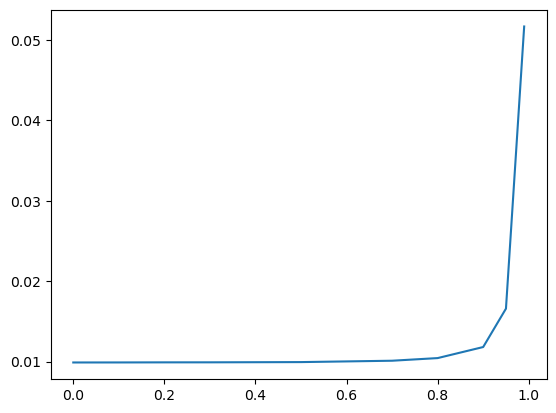

In [19]:
# 1
X, y = data_regression_2D_1()
alphas = [0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 0.99, 1]
arr_1 = []
for alpha in alphas[:-1]:
    arr_1.append(func_reg(X, y, alpha))
plt.plot(alphas[:-1], arr_1)
plt.show()

Regression $y = x_1 + x_2$ rit_alpha = 0 for max_depth from 1 to 20

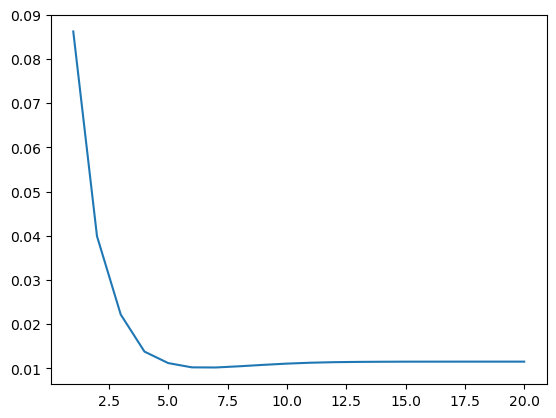

In [ ]:
X, y = data_regression_2D_1()
arr = []
for i in range(1, 21):
    rf = MyRandomForestRegressor(random_state=0,
                                              n_estimators=1000,
                                              max_depth=i,
                                              max_leaf_nodes=2**i,
                                              bootstrap=True,
                                              oob_score=mean_squared_error,
                                              subforest_importance=True,
                                              normalize_importance=False,
                                              rit_alpha=0)
    rf.fit(X, y)
    arr.append(rf.oob_score_)
plt.plot(range(1,21), arr)
plt.show()

Regression $y = x_1 + x_2$ rit_alpha = 0.99 for max_depth from 1 to 20

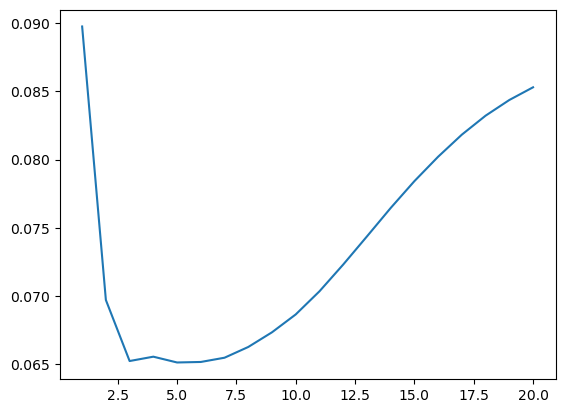

In [28]:
X, y = data_regression_2D_1()
arr = []
for i in range(1, 21):
    rf = MyRandomForestRegressor(random_state=0,
                                              n_estimators=1000,
                                              max_depth=i,
                                              max_leaf_nodes=2**i,
                                              bootstrap=True,
                                              oob_score=mean_squared_error,
                                              subforest_importance=True,
                                              normalize_importance=False,
                                              rit_alpha=0.99)
    rf.fit(X, y)
    arr.append(rf.oob_score_)
plt.plot(range(1,21), arr)
plt.show()

Regression $y = x_1 + x_2$ rit_alpha = 0.5 for max_depth from 1 to 20

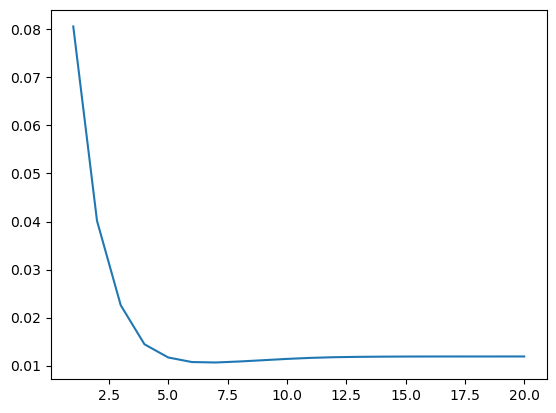

In [29]:
X, y = data_regression_2D_1()
arr = []
for i in range(1, 21):
    rf = MyRandomForestRegressor(random_state=0,
                                              n_estimators=1000,
                                              max_depth=i,
                                              max_leaf_nodes=2**i,
                                              bootstrap=True,
                                              oob_score=mean_squared_error,
                                              subforest_importance=True,
                                              normalize_importance=False,
                                              rit_alpha=0.5)
    rf.fit(X, y)
    arr.append(rf.oob_score_)
plt.plot(range(1,21), arr)
plt.show()

Regression $y = x_1 \cdot x_2$

rit_alpha = 0, max_depth = 6
rit_alpha = 0.1, max_depth = 6
rit_alpha = 0.2, max_depth = 6
rit_alpha = 0.3, max_depth = 6
rit_alpha = 0.5, max_depth = 6
rit_alpha = 0.7, max_depth = 6
rit_alpha = 0.8, max_depth = 7
rit_alpha = 0.9, max_depth = 7
rit_alpha = 0.95, max_depth = 7
rit_alpha = 0.99, max_depth = 7


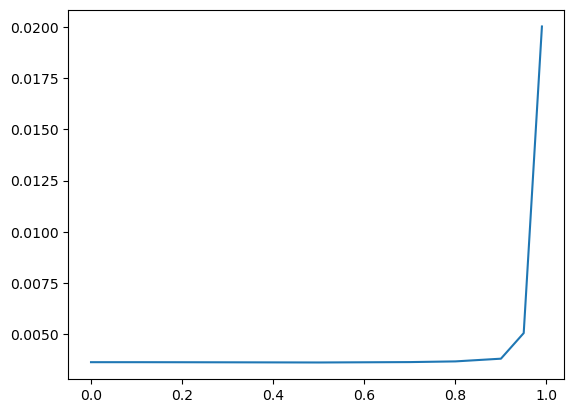

In [33]:
# 2
X, y = data_regression_2D_2()
alphas = [0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 0.99, 1]
arr_2 = []
for alpha in alphas[:-1]:
    arr_2.append(func_reg(X, y, alpha))
plt.plot(alphas[:-1], arr_2)
plt.show()

## Classification

Classification 1, есть взаимодействие, rit_alpha = 0.99 for max_depth from 1 to 20

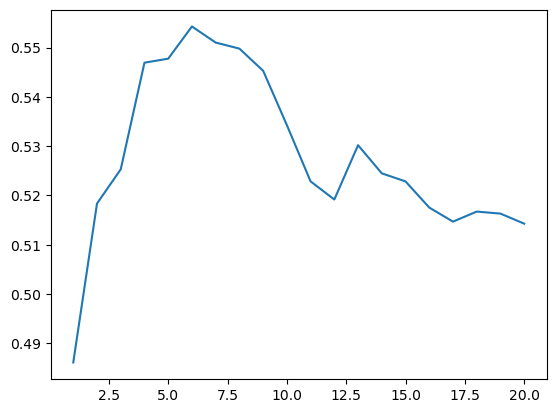

In [40]:
X, y = data_classification_2D_3()
arr = []
for i in range(1, 21):
    rf = MyRandomForestClassifier(random_state=0,
                                              n_estimators=1000,
                                              max_depth=i,
                                              max_leaf_nodes=2**i,
                                              bootstrap=True,
                                              oob_score=accuracy_score,
                                              subforest_importance=True,
                                              normalize_importance=False,
                                              rit_alpha=0.99)
    rf.fit(X, y)
    arr.append(rf.oob_score_)
plt.plot(range(1,21), arr)
plt.show()

Classification, есть взаимодействие

rit_alpha = 0, max_depth = 18
rit_alpha = 0.1, max_depth = 18
rit_alpha = 0.2, max_depth = 18
rit_alpha = 0.3, max_depth = 15
rit_alpha = 0.5, max_depth = 15
rit_alpha = 0.7, max_depth = 15
rit_alpha = 0.8, max_depth = 15
rit_alpha = 0.9, max_depth = 11
rit_alpha = 0.95, max_depth = 10
rit_alpha = 0.99, max_depth = 10


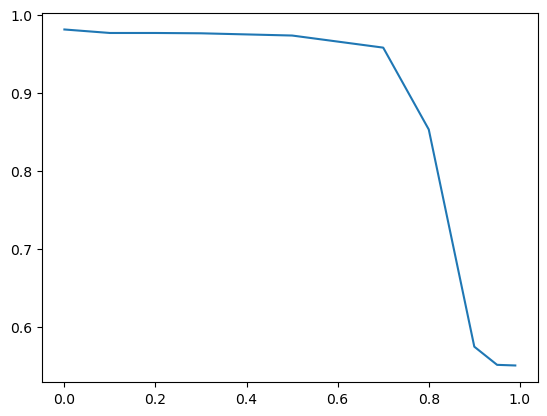

In [44]:
# 3
X, y = data_classification_2D_3()
alphas = [0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 0.99, 1]
arr_3 = []
for alpha in alphas[:-1]:
    arr_3.append(func_class(X, y, alpha))
plt.plot(alphas[:-1], arr_3)
plt.show()

Classification, без взаимодействия

rit_alpha = 0, max_depth = 8
rit_alpha = 0.1, max_depth = 8
rit_alpha = 0.2, max_depth = 8
rit_alpha = 0.3, max_depth = 8
rit_alpha = 0.5, max_depth = 9
rit_alpha = 0.7, max_depth = 9
rit_alpha = 0.8, max_depth = 9
rit_alpha = 0.9, max_depth = 9
rit_alpha = 0.95, max_depth = 9
rit_alpha = 0.99, max_depth = 8


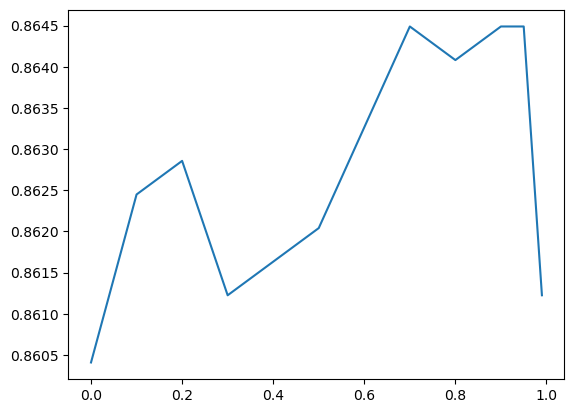

In [45]:
# 4
X, y = data_classification_2D_4()
alphas = [0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 0.99, 1]
arr_4 = []
for alpha in alphas[:-1]:
    arr_4.append(func_class(X, y, alpha))
plt.plot(alphas[:-1], arr_4)
plt.show()